In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import math
%matplotlib inline

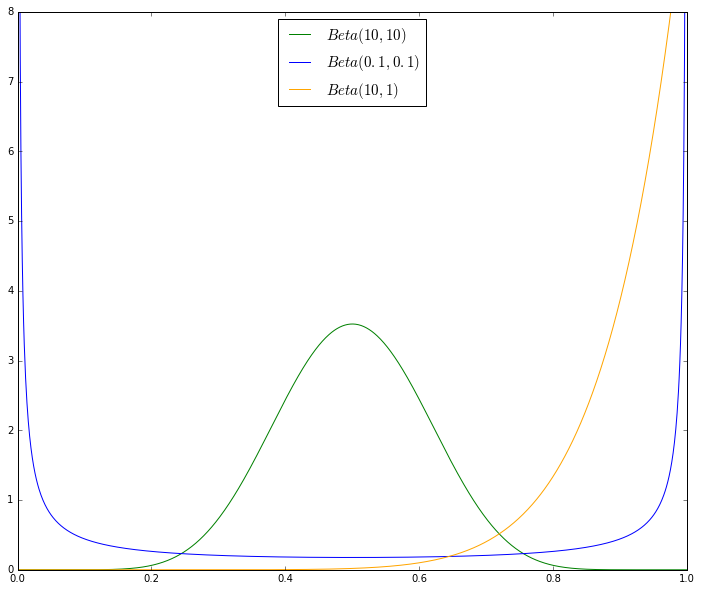

In [115]:
prior_params = [[10,10], [0.1,0.1], [10,1]]
OX = np.arange(0,1,0.001)
colors = ['g','b','orange']
plt.figure(figsize=(12,10))
for i in range(len(prior_params)) :
    plt.plot(OX,sps.beta.pdf(OX,
                prior_params[i][0],prior_params[i][1]),
                colors[i],
                label=r'$Beta(' + 
                     str(prior_params[i][0]) + ',' 
                     + str(prior_params[i][1])
                     +r')$')
plt.axis([0,1,0,8])
plt.legend(loc='upper center', prop={'size':15})
plt.show()

$Beta(10,10)$ - априорное распределение 'скорее честной' монеты, так как $argmax(P) = 0.5$

$Beta(0.1,0.1)$ - априорное распределение 'скорее нечестной' монеты, так как плотность в окрестности $0.5$ минимальна

$Beta(10,1)$ - априорное распределение 'скорее нечестной' монеты смещенной в сторону герба,

наиболее вероятны значения $p$ в окрестности 1

In [83]:
N = 20
prob = [0.10 , 0.48 , 0.90]
sample = [sps.bernoulli.rvs(p=p,size=N) for p in prob]

In [84]:
def get_bayesian_evaluation(X, prior_params) :
    pa = prior_params[0]
    pb= prior_params[1]
    return sps.beta.mean(a=(pa + np.sum(X)), b=(pb + len(X) - np.sum(X)))

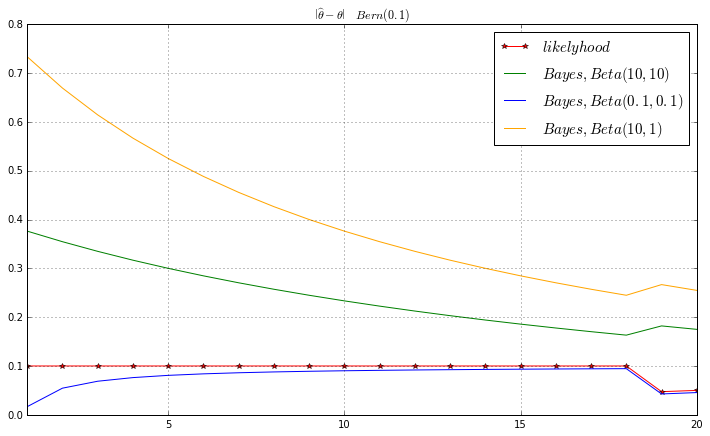

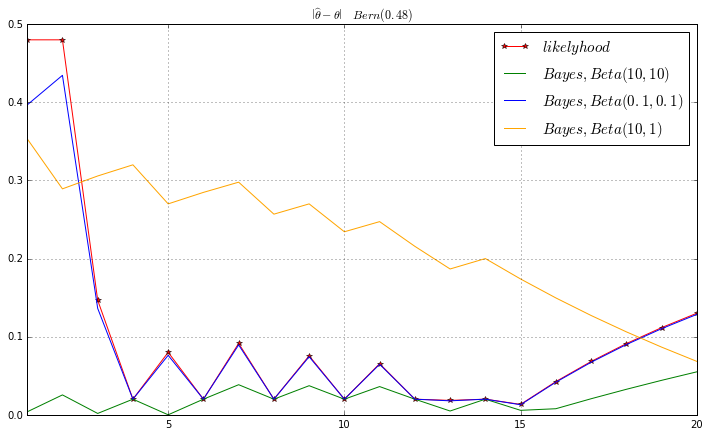

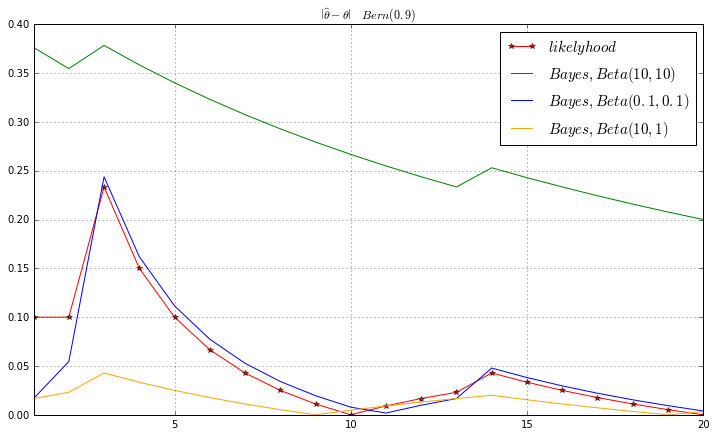

In [117]:

n = np.arange(1,N+1,1)
for i in range(len(prob)) :
    title = r'$\left|\widehat{\theta} - \theta\right| \quad Bern(' \
            + str(prob[i]) + r')$'
    plt.figure(figsize=(12,7))
    plt.title(title)

    #likelyhood evaluation for bernoulli distr
    lh_evl = [abs(prob[i] - np.mean(sample[i][0:k])) for k in n]
    
    bayes_evl = [[abs(prob[i] - get_bayesian_evaluation(sample[i][0:k],params)) for k in n]
                 for params in prior_params]

    #build plots
    plt.plot(n,lh_evl,'-*r',label = r'$likelyhood$')
    for i in range(len(prior_params)) :
        plt.plot(n,bayes_evl[i],colors[i],
                 label = r'$Bayes, Beta(' + str(prior_params[i][0]) + ',' 
                         + str(prior_params[i][1]) + r')$')
    plt.xlim([1,20])
    plt.legend(loc='best',prop={'size':15})
    plt.grid(True)
    plt.show()

Байесовская оценка, соответствующая наиболее точному предположению о значении  $\theta$,наиболее точно приближает параметр.

Оценка максмального правдободобия примерно совпадает с байесовской оценкой с априорным распределением $Beta(0.1,0.1)$

Хорошие оценки:

Для $\theta = 0.1$ , $Bayes : Beta(0.1,0.1)$ и оценка максимального правдоподобия

Для $\theta = 0.48$ , $Bayes : Beta(10,10)$

Для $\theta = 0.9$ , все оценки, кроме $Bayes : Beta(10,10)$